In [236]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [237]:
df = pd.read_csv('heart.csv')

In [238]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [239]:
#Estadisticas del DataSet: Entender como se comportan los datos.
#(1) El tamaño del dataSet
df.shape

(918, 12)

In [240]:
df.size

11016

In [241]:
#(2) Clasificacion de los tipos de datos que se encuentran disponibles.
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [242]:
#(3) Que informacion disponible tenemos de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [243]:
# (4) Comprobar los datos faltantes en el dataSet.
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [244]:
# Revisaremos los numeros distintos presentes en el DataSet.
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [245]:
#(5) Revisar los datos de forma estadisctica, es decir, poder encontrar la media, la desviacion estandar.
df.describe().style.background_gradient(cmap='Blues')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [246]:
df.describe(include='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [247]:
df[['Sex','HeartDisease']].groupby(['Sex']).mean().sort_values(['HeartDisease'] , ascending = False).style.background_gradient(cmap='Blues')

,HeartDisease
Sex,
M,0.631724
F,0.259067


In [248]:
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [249]:
#Porcentaje de pacientes con problemas cardiacos.
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

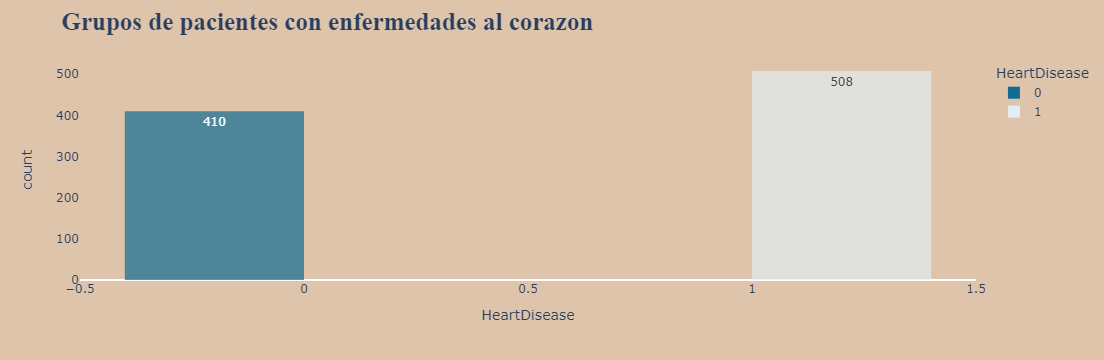

In [250]:
fig = px.histogram(df, x = 'HeartDisease' , barmode = 'group' , color = 'HeartDisease',color_discrete_sequence=['#106C93','#E2EEF3'] , text_auto = True,opacity=.7)
fig.update_layout( title = '<b> Grupos de pacientes con enfermedades al corazon <b>' ,  title_font = {"size":25,'family': 'Serif'},paper_bgcolor='#DDC4AA',plot_bgcolor='#DDC4AA', showlegend=True)
fig.update_xaxes(showgrid = False)
fig.update_yaxes (showgrid = False)

In [251]:
# El dolor de pecho mas común en pacientes enfermos.
heart_disease_group = df[df['HeartDisease'] == 1]
chest_pain_counts = heart_disease_group['ChestPainType'].value_counts()
print(chest_pain_counts)

ChestPainType
ASY    392
NAP     72
ATA     24
TA      20
Name: count, dtype: int64


In [252]:
# El dolor de pecho mas común en pacientes enfermos.
heart_disease_group = df[df['HeartDisease'] == 1]
chest_pain_counts = heart_disease_group['ChestPainType'].value_counts().reset_index()
chest_pain_counts.columns = ['ChestPainType', 'Cuenta']
print(chest_pain_counts)

  ChestPainType  Cuenta
0           ASY     392
1           NAP      72
2           ATA      24
3            TA      20


In [253]:
#Tabla pivot. los tipos de dolores de pecho mas comunes en los pacientes según el genero.
df.pivot_table(index = 'ChestPainType' , columns= 'Sex' , values = 'HeartDisease', aggfunc = 'count').style.background_gradient(cmap='Blues')

Sex,F,M
ChestPainType,,
ASY,70,426
ATA,60,113
NAP,53,150
TA,10,36


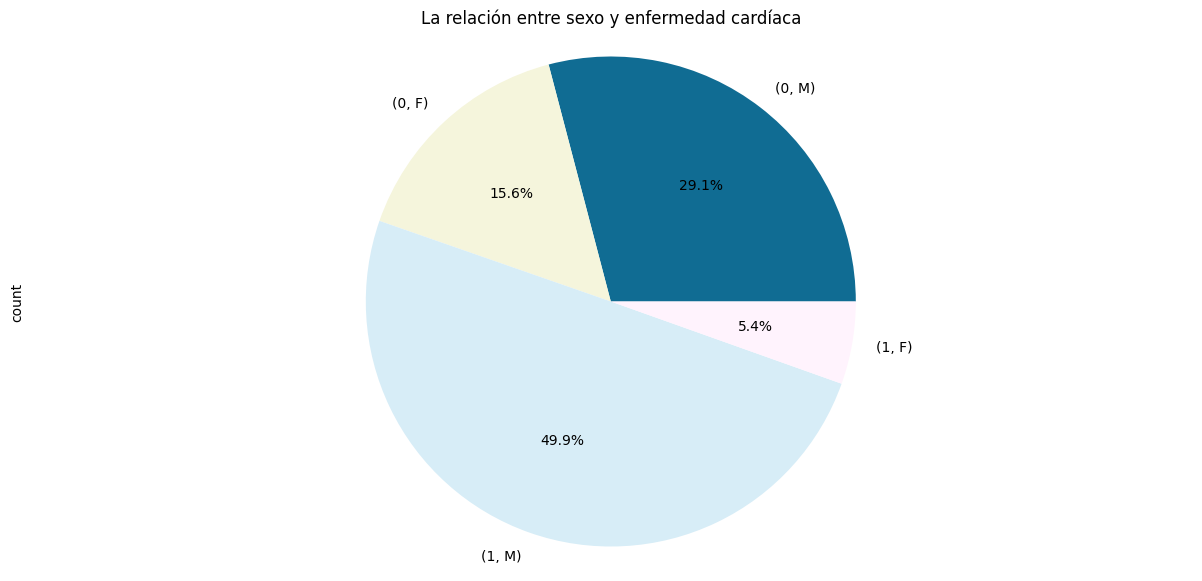

In [254]:
df.groupby(['HeartDisease'])['Sex'].value_counts().plot.pie(autopct ='%1.1f%%' , colors = ['#106C93','beige','#D7EDF7','#FFF3FD'],
                                                            figsize = (15,7))
plt.title( 'La relación entre sexo y enfermedad cardíaca')
plt.axis('equal')
plt.show()

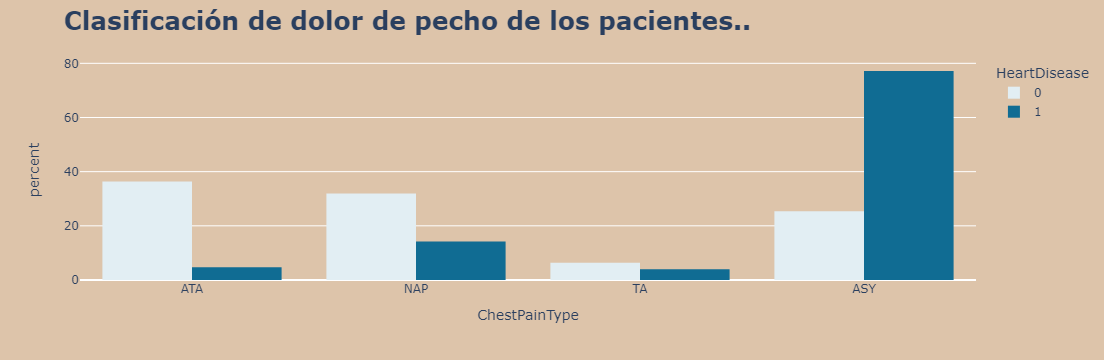

In [255]:
fig = px.histogram ( df, x ='ChestPainType' , color = 'HeartDisease' , histnorm = 'percent' , barmode = 'group' ,
                    color_discrete_sequence = ['#E2EEF3','#106C93'],
                   )
fig.update_layout(title='<b> Clasificación de dolor de pecho de los pacientes.. <b>' , title_font = {'size' : 25},
                  paper_bgcolor='#DDC4AA',
                 plot_bgcolor='#DDC4AA',
                 showlegend=True)
fig.show()

In [256]:
# Los 3 tipos de clasificación de los electrogramas.
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [257]:
#El total de cada uno de los electrogramas.
pd.get_dummies(df['RestingECG']).sum()

LVH       188
Normal    552
ST        178
dtype: int64

In [258]:
# Quiero saber que pacientes positivos dieron el electrograma y bajo que clasificación se encuentran.
heart_var = df[df['HeartDisease'] == 1]
Resting_ECG = heart_var['RestingECG'].value_counts().reset_index()
Resting_ECG.columns= ('Resting_ECG','Cuenta total')
print(Resting_ECG)

  Resting_ECG  Cuenta total
0      Normal           285
1          ST           117
2         LVH           106


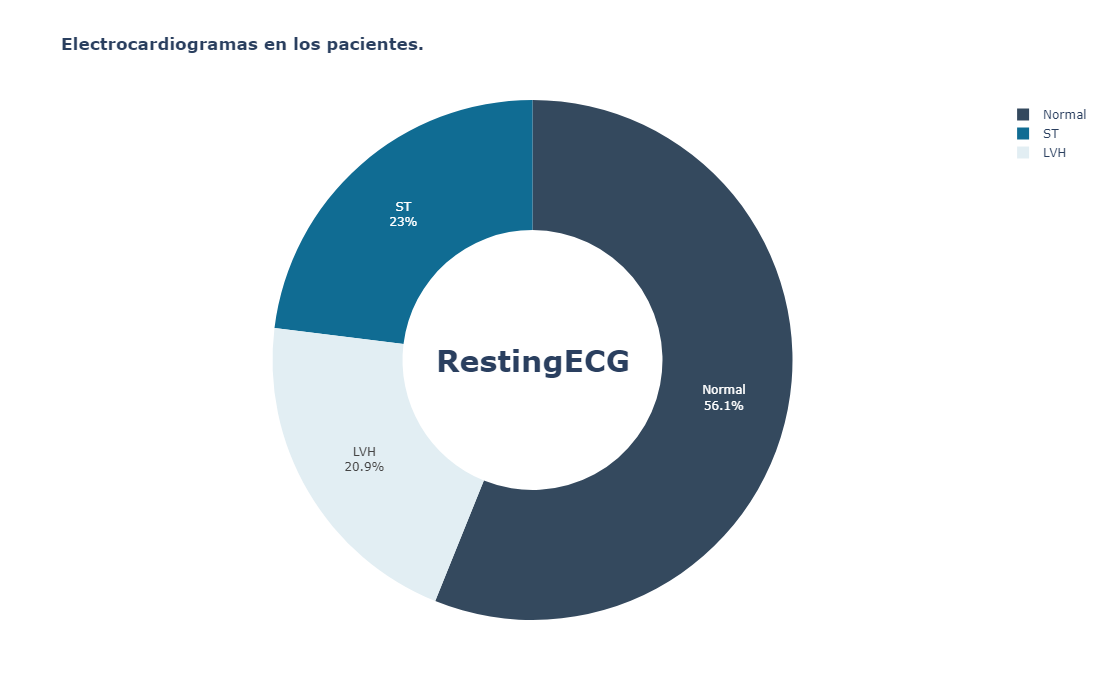

In [259]:
fig = px.pie( df, values = 'HeartDisease' , names = 'RestingECG' ,  title = '<b> Electrocardiogramas en los pacientes. <b>' 
             , color_discrete_sequence=['#34495E','#106C93','#E2EEF3'],
              height=700,width=800,hole=.5,hover_data='HeartDisease')
fig.update_traces(textposition = "inside" , textinfo = "percent+label")
fig.update_layout( annotations=[dict(text='<b>RestingECG</b>',
                                x=0.5, y=0.5, font_size=30,
                                showarrow=False)])
fig.show()
             

In [260]:
#Cantidad de pacientes y no pacientes en el DataSet con respecto al flujo sangueneo en reposo.
pacientes = df[df['HeartDisease'] == 1]
no_pacientes = df[df['HeartDisease'] == 0]

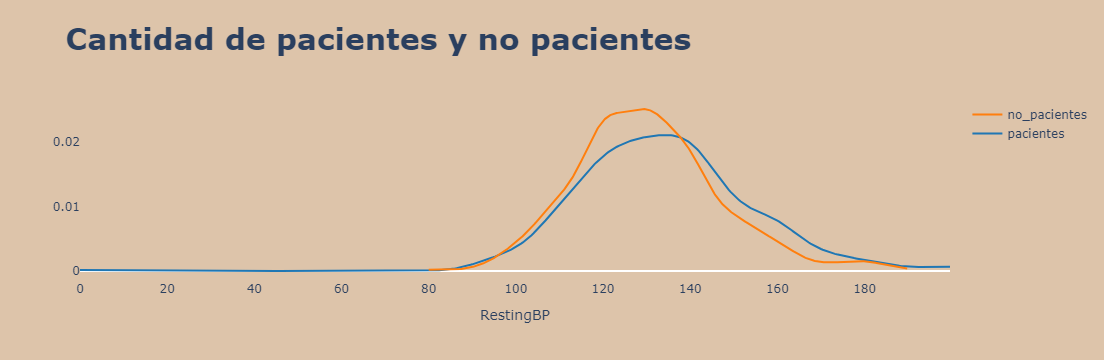

In [261]:
fig = ff.create_distplot([pacientes['RestingBP'],no_pacientes['RestingBP']] , ['pacientes','no_pacientes'],
                         show_hist= False, show_rug = False)
fig.update_layout(title = '<b> Cantidad de pacientes y no pacientes <b>' ,
                  title_font ={'size':30},
                  paper_bgcolor='#DDC4AA',
                  plot_bgcolor='#DDC4AA',
                  showlegend=True)
fig.update_xaxes(showgrid = False, title = 'RestingBP')
fig.update_yaxes(showgrid=False)
fig.show()

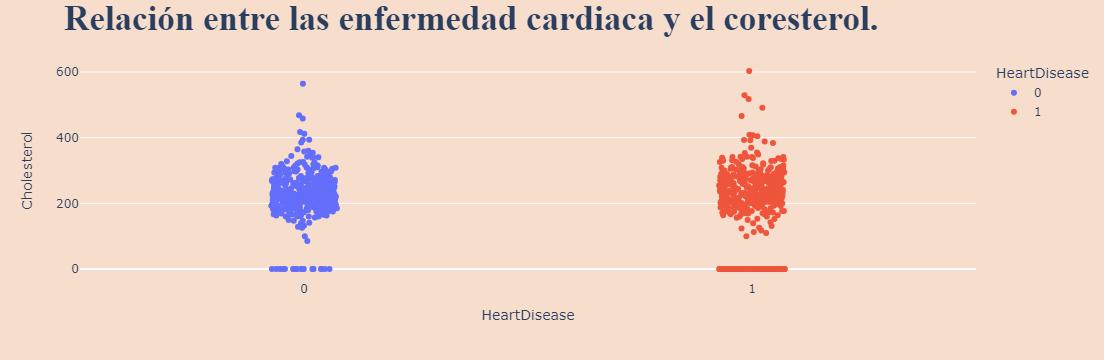

In [262]:
#Encontrar la relacion entre las enfermedad cardiaca y el coresterol.
fig = px.strip( df ,x = 'HeartDisease' , y= 'Cholesterol' , color = 'HeartDisease')
fig.update_layout(title = '<b> Relación entre las enfermedad cardiaca y el coresterol. <b>',
                  title_font={'size':35,'family': 'Serif'},
                  paper_bgcolor='#F6DDCC',
                  plot_bgcolor='#F6DDCC')
fig.update_xaxes(showgrid=False)
fig.show()

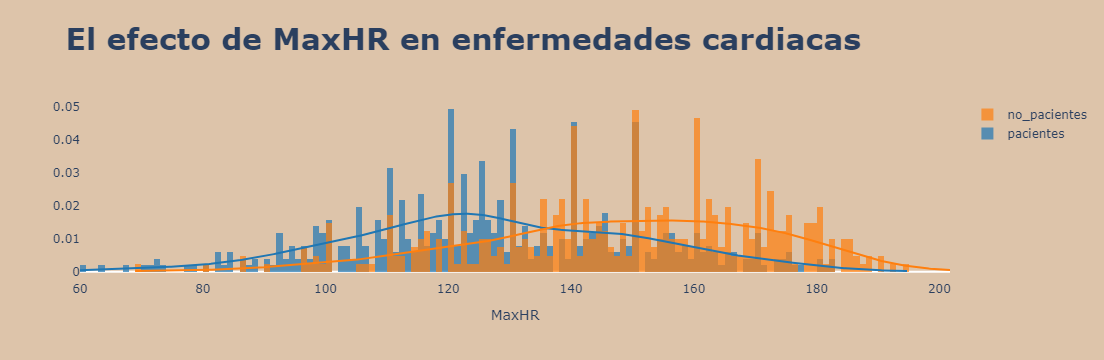

In [263]:
fig= ff.create_distplot([pacientes['MaxHR'],no_pacientes['MaxHR']] , ['pacientes','no_pacientes'],
                        show_hist = True , show_rug = False)
fig.update_layout(title = '<b> El efecto de MaxHR en enfermedades cardiacas  <b>' ,
                  title_font ={'size':30},
                  paper_bgcolor='#DDC4AA',
                  plot_bgcolor='#DDC4AA',
                  showlegend=True)
fig.update_xaxes(showgrid = False, title = 'MaxHR')
fig.update_yaxes(showgrid=False)

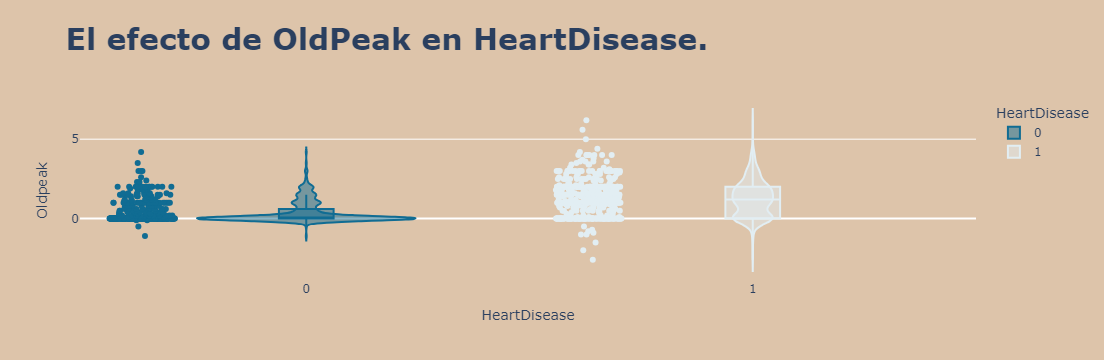

In [264]:
fig = px.violin(df, x= 'HeartDisease' , y= 'Oldpeak' , color = 'HeartDisease' , 
                title = '<b> El efecto de OldPeak en HeartDisease. <b>' , violinmode = 'overlay',
                color_discrete_sequence=['#106C93','#E2EEF3'],box=True,points='all')
fig.update_layout(title_font= {'size':30},
                  paper_bgcolor='#DDC4AA',
                  plot_bgcolor='#DDC4AA')
fig.show()
                  

In [265]:
df.pivot_table(index = 'FastingBS' , columns = 'HeartDisease' , aggfunc =  'count')

Age      ChestPainType      Cholesterol      ExerciseAngina  \
HeartDisease    0    1             0    1           0    1              0   
FastingBS                                                                   
0             366  338           366  338         366  338            366   
1              44  170            44  170          44  170             44   

                  MaxHR      Oldpeak      RestingBP      RestingECG       \
HeartDisease    1     0    1       0    1         0    1          0    1   
FastingBS                                                                  
0             338   366  338     366  338       366  338        366  338   
1             170    44  170      44  170        44  170         44  170   

             ST_Slope       Sex       
HeartDisease        0    1    0    1  
FastingBS                             
0                 366  338  366  338  
1                  44  170   44  170

In [266]:
#Estudio de relacion entre FastingBS y HeartDisease.
pd.get_dummies(df['FastingBS']).sum()

0    704
1    214
dtype: int64

In [267]:
df.pivot_table(index='FastingBS' , columns= 'HeartDisease', aggfunc = {'HeartDisease' : 'count'}).style.background_gradient(cmap='Blues')

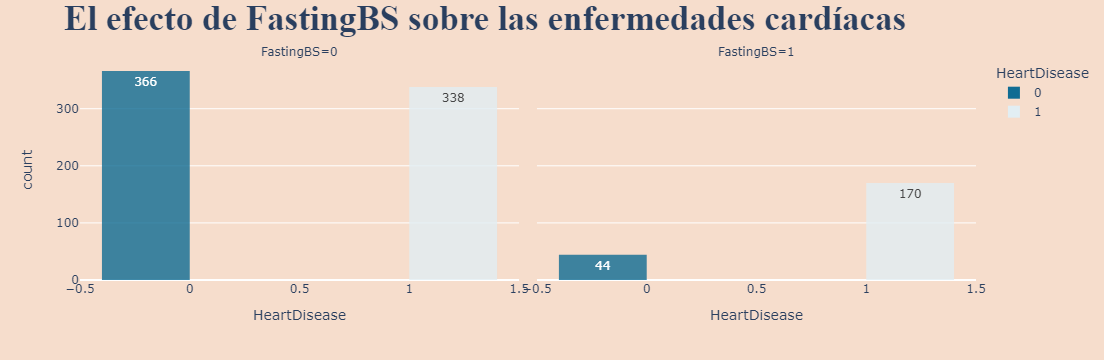

In [268]:
fig = px.histogram( df , x='HeartDisease',
                   color ='HeartDisease',
                   facet_col = 'FastingBS',
                   barmode= 'group',
                   color_discrete_sequence=['#106C93','#E2EEF3'],
                   text_auto=True,
                   opacity=.8)
fig.update_layout( title = '<b> El efecto de FastingBS sobre las enfermedades cardíacas <b>',
                  title_font={'size':35,'family': 'Serif'},paper_bgcolor='#F6DDCC',
                  plot_bgcolor='#F6DDCC')
fig.show()
                  

In [269]:
# Relación entre ExerciseAngina y el heartdisease.
un = df["ExerciseAngina"].unique()
re = pd.get_dummies(df["ExerciseAngina"]).sum()
print("Los valores de entrega son:" , un)
print("La suma de los valores son los siguientes:\n" , re)

Los valores de entrega son: ['N' 'Y']
La suma de los valores son los siguientes:
 N    547
Y    371
dtype: int64


In [270]:
df.pivot_table(index = 'ExerciseAngina' , columns = 'HeartDisease' , aggfunc = {'HeartDisease':'count'}).style.background_gradient(cmap='Blues')

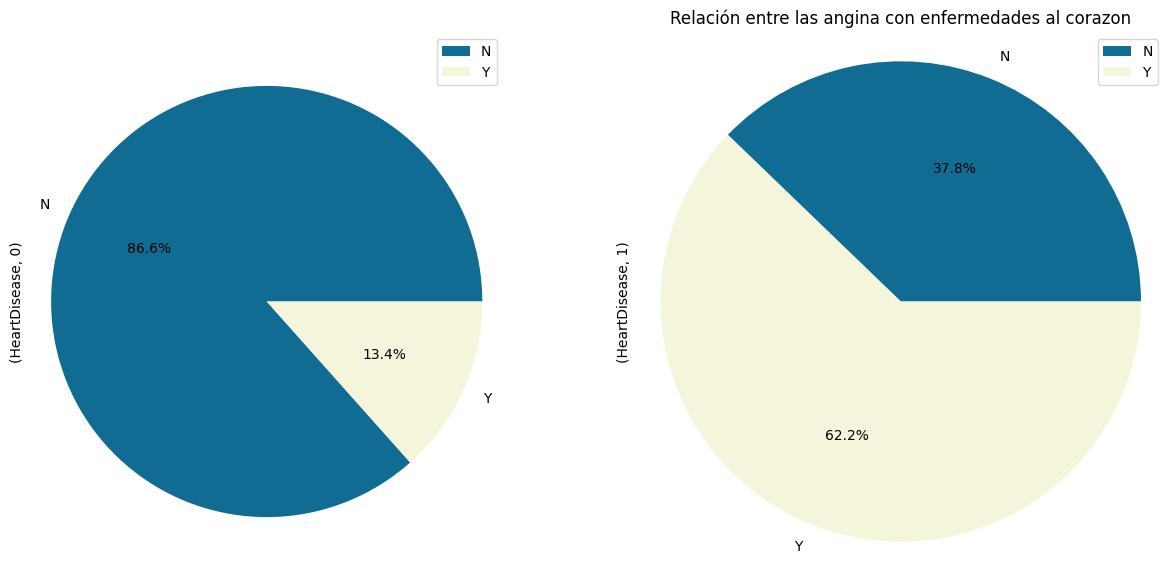

In [271]:
df.pivot_table(index = 'ExerciseAngina' , columns = 'HeartDisease' , aggfunc = {'HeartDisease':'count'}).plot.pie(autopct ='%1.1f%%' , 
                                                                                                                 colors = ['#106C93','beige','#D7EDF7','#FFF3FD'],
                                                                                                                 subplots=True,figsize = (15,7))
plt.title('Relación entre las angina con enfermedades al corazon')
plt.axis('equal')
plt.show()

In [272]:
#Relación entre los ST_Slope y Heartdisease.
h=df['ST_Slope'].unique()
l=pd.get_dummies(df['ST_Slope']).sum()
print('Los valores de entrada de las variables de ST_Slope son:\n', h)
print('Los valores totales presentes de ST_Slope en el DataSet son:\n',l)

Los valores de entrada de las variables de ST_Slope son:
 ['Up' 'Flat' 'Down']
Los valores totales presentes de ST_Slope en el DataSet son:
 Down     63
Flat    460
Up      395
dtype: int64


In [273]:
df.pivot_table(index='ST_Slope' , columns='HeartDisease', aggfunc={'HeartDisease':'count'}).style.background_gradient(cmap='Blues') 

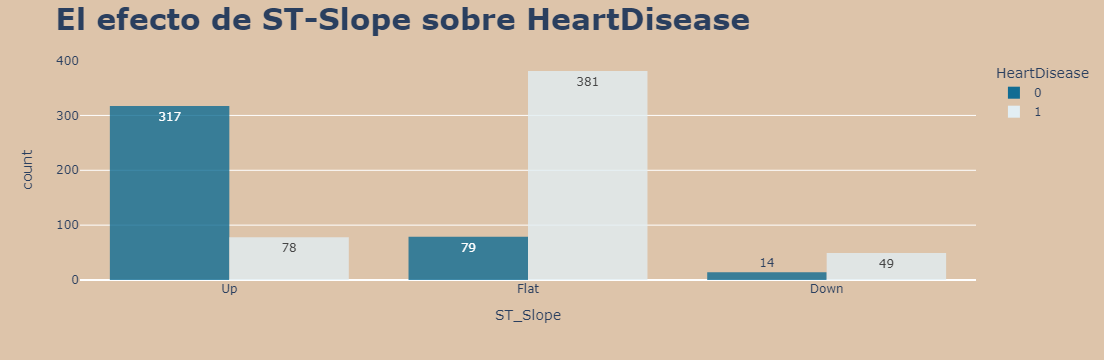

In [274]:
fig= px.histogram(df, x= 'ST_Slope' , color='HeartDisease',barmode= 'group',
                   color_discrete_sequence=['#106C93','#E2EEF3'],
                   text_auto=True,
                   opacity=.8)
fig.update_layout(paper_bgcolor='#DDC4AA',
                  plot_bgcolor='#DDC4AA',
                  title='<b>El efecto de ST-Slope sobre HeartDisease</b>',title_font={'size':30})
fig.show()

In [275]:
#Rango de edad con las personas que se encuentran bajo estudio.
df[['Age','HeartDisease']].groupby(['HeartDisease']).mean().sort_values(['Age'] , ascending = False).style.background_gradient(cmap='Oranges')

,Age
HeartDisease,
1,55.899606
0,50.551220


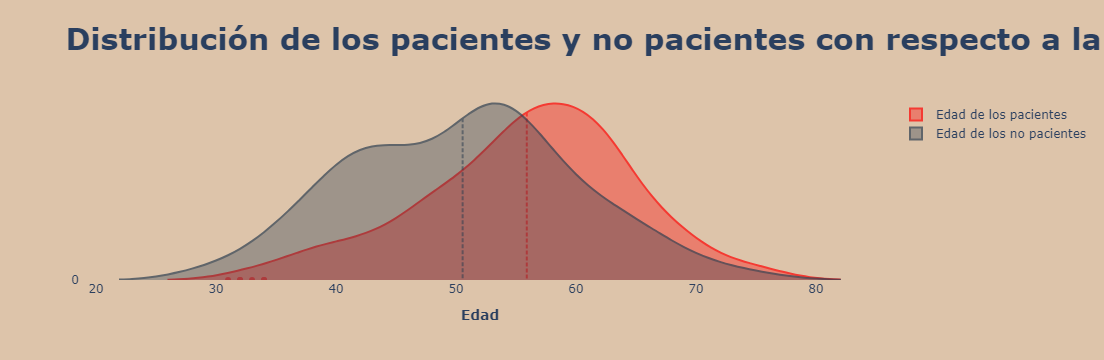

In [276]:
fig = go.Figure()
fig.add_trace(go.Violin(x=pacientes['Age'] , line_color = 'red', y0=0 , name = 'Edad de los pacientes'))
fig.add_trace(go.Violin(x=no_pacientes['Age'], line_color = '#2C3E50' , y0=0, name='Edad de los no pacientes'))
fig.update_traces(orientation='h', side= 'positive', meanline_visible = True)
fig.update_layout(title = '<b> Distribución de los pacientes y no pacientes con respecto a la edad <b>',
                  titlefont={'size':30},
                 xaxis_zeroline=False,
                 paper_bgcolor='#DDC4AA',
                 plot_bgcolor='#DDC4AA')
fig.update_xaxes(showgrid= False,title = '<b> Edad <b>')
fig.update_traces(opacity =.7)
fig.show()

No existen valores faltantes


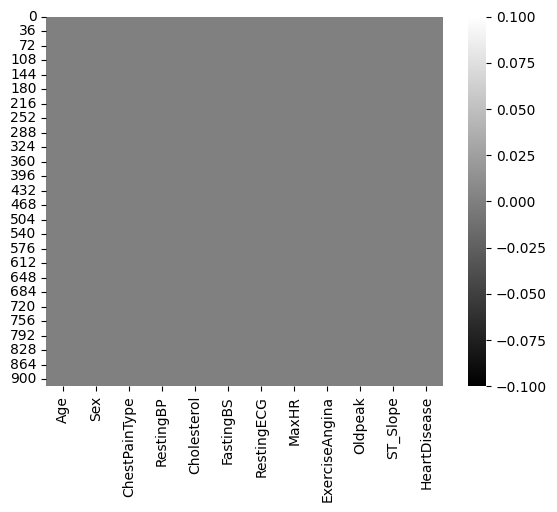

In [277]:
#Preprocesamiento de datos.
sns.heatmap(df.isnull(),cmap='gray')
print('No existen valores faltantes')

In [278]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
categorias= ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for label in categorias:
    df[label]=LE.fit_transform(df[label])

In [279]:
#Traspasar las variables numeras en bins (contenedores), para un mejor procesamiento.
df['Age'] = pd.cut(df['Age'],4)
df['RestingBP'] = pd.cut(df['RestingBP'],3)
df['Cholesterol']= pd.cut(df['Cholesterol'],3)
df['MaxHR'] = pd.cut(df['MaxHR'],3)
df['Oldpeak'] = pd.cut(df['Oldpeak'],2)

In [280]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,"(27.951, 40.25]",1,1,"(133.333, 200.0]","(201.0, 402.0]",0,1,"(154.667, 202.0]",0,"(-2.609, 1.8]",2,0
1,"(40.25, 52.5]",0,2,"(133.333, 200.0]","(-0.603, 201.0]",0,1,"(154.667, 202.0]",0,"(-2.609, 1.8]",1,1
2,"(27.951, 40.25]",1,1,"(66.667, 133.333]","(201.0, 402.0]",0,2,"(59.858, 107.333]",0,"(-2.609, 1.8]",2,0
3,"(40.25, 52.5]",0,0,"(133.333, 200.0]","(201.0, 402.0]",0,1,"(107.333, 154.667]",1,"(-2.609, 1.8]",1,1
4,"(52.5, 64.75]",1,2,"(133.333, 200.0]","(-0.603, 201.0]",0,1,"(107.333, 154.667]",0,"(-2.609, 1.8]",2,0


In [281]:
categorias2 = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for seg in categorias2:
    df[seg] = LE.fit_transform(df[seg]).astype(int)

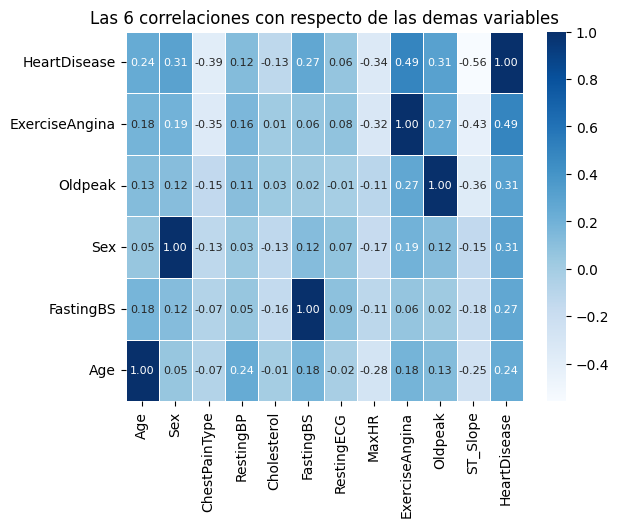

In [282]:
correlacion = df.corr()
max_corr = correlacion.nlargest(6,'HeartDisease')
sns.heatmap(max_corr, annot = True, fmt = '.2F', annot_kws = {"size":8},linewidths=0.5,cmap='Blues')
plt.title( 'Las 6 correlaciones con respecto de las demas variables')
plt.show()

In [283]:
# Rebanar los datos en entrenamiento y de prueba. Para poder comernzar a entrenar el modelo.
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [284]:
df.shape

(918, 12)

In [285]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [286]:
print("La forma de la variable dependiente considerando filas y columnas son:" , x.shape)
print("La variable objetivo es considera lo siguiente:" , y.shape)

La forma de la variable dependiente considerando filas y columnas son: (918, 11)
La variable objetivo es considera lo siguiente: (918,)


In [295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42,shuffle=True)

In [296]:
x_train_shape= print(x_train.shape)
y_train_shape = print(y_train.shape)
x_test_shape = print(x_test.shape)
y_test_shape = print(y_test.shape)

(615, 11)
(615,)
(303, 11)
(303,)


In [297]:
#Modelamiento de los datos. (1) LogisticRegression Model (2) XGBClassifier Model (3)CatBoostClassifier Model
# (4) GradientBoostingClassifier Model (5) SVC Model
from sklearn.linear_model import LogisticRegression

In [299]:
# (1) LogisticRegression Model
LR = LogisticRegression().fit(x_train,y_train)

In [300]:
LR_entrenamiento_score = round(LR.score(x_train,y_train),4)*100
LR_prueba_score = round(LR.score(x_test,y_test),4)*100
print("El puntaje de LR entranamiento:" , LR_entrenamiento_score)
print("El puntaje de LR prueba:" , LR_prueba_score)

El puntaje de LR entranamiento: 85.37
El puntaje de LR prueba: 84.49


In [301]:
LR_y_pred = LR.predict(x_test)

In [303]:
# (2) XGBClassifier Model
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train,y_train)

In [305]:
xgb_entrenamiento_score = round(xgb.score(x_train,y_train),4)*100
xgb_prueba_score = round(xgb.score(x_test,y_test),4)*100
print("El puntaje de xgb entrenamiento:" ,xgb_entrenamiento_score)
print("El puntaje de xgb prueba:", xgb_prueba_score)

El puntaje de xgb entrenamiento: 96.41999999999999
El puntaje de xgb prueba: 84.82


In [306]:
xgb_y_pred = xgb.predict(x_test)

In [307]:
# (3) CatBoostClassifier Model
from catboost import CatBoostClassifier

In [311]:
CBC = CatBoostClassifier(verbose=False).fit(x_train,y_train)

In [312]:
CBC_entrenamiento_score = round(CBC.score(x_train,y_train),4)*100
CBC_prueba_score = round(CBC.score(x_test,y_test),4)*100
print("El puntaje para CBC entrenamiento:" , CBC_entrenamiento_score)
print("El puntaje para CBC de prueba:" ,  CBC_prueba_score)

El puntaje para CBC entrenamiento: 94.15
El puntaje para CBC de prueba: 85.81


In [323]:
CBC_y_pred = CBC.predict(x_test)

In [314]:
# (4) GradientBoostingClassifier Model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [316]:
GBC_entrenamiento_score = round(GBC.score(x_train,y_train),4)*100
GBC_prueba_score = round(GBC.score(x_train,y_train),4)*100

print("El puntaje para GBC entrenamiento:" , GBC_entrenamiento_score)
print("El puntaje para GBC de prueba:" ,  GBC_prueba_score)

El puntaje para GBC entrenamiento: 91.53999999999999
El puntaje para GBC de prueba: 91.53999999999999


In [317]:
GBC_y_pred= GBC.predict(x_test)

In [318]:
# (5) SVC Model
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

In [320]:
svc_entrenamiento_score= round(svc.score(x_train,y_train),4)*100
svc_prueba_score = round(svc.score(x_test,y_test),4)*100

print("El puntaje para svc entrenamiento:" , svc_entrenamiento_score)
print("El puntaje para svc de prueba:" , svc_prueba_score)

El puntaje para svc entrenamiento: 87.97
El puntaje para svc de prueba: 85.81


In [321]:
svc_y_pred = svc.predict(x_test)

In [322]:
# Evaluacion de los modelos.
from sklearn.metrics import confusion_matrix

In [325]:
model_prediccion = [LR_y_pred,xgb_y_pred,CBC_y_pred,GBC_y_pred,svc_y_pred]

In [326]:
model = {1:'LR_y_pred' , 2:'xgb_y_pred', 3: 'CBC_y_pred' , 4 : 'GBC_y_pred' , 5 : 'svc_y_pred'}

In [327]:
cm_names = ['TP','FP','FN','TN']

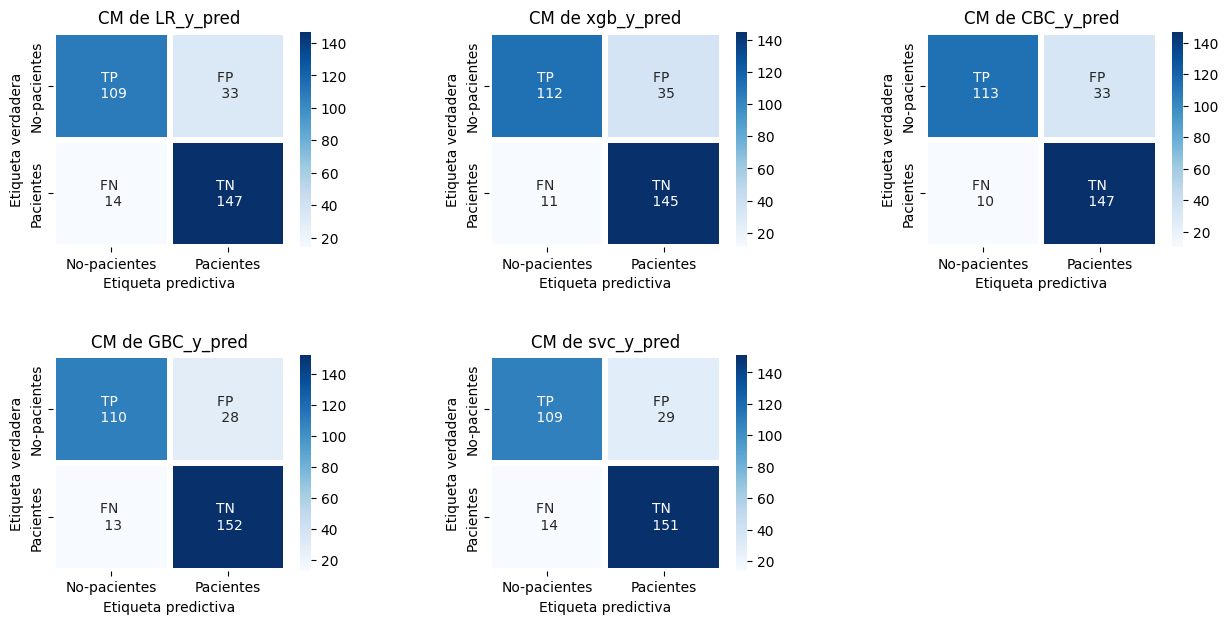

In [333]:
plt.figure(figsize=(15,7))
for i,y_pred in enumerate(model_prediccion,1):
    cm = confusion_matrix(y_pred,y_test)
    value_count = [value for value in cm.flatten()]
    all_labels= [f'{v1} \n {v2}' for v1 , v2 in zip (cm_names , value_count)]
    all_labels = np.asarray(all_labels).reshape(2,2)
    plt.subplot(2,3,i)
    sns.heatmap(cm,annot=all_labels, cmap='Blues',
                linewidth=3,fmt ='',
                xticklabels=['No-pacientes','Pacientes'],
                yticklabels=['No-pacientes','Pacientes'])
    plt.title('CM de ' + model[i])
    plt.xlabel('Etiqueta predictiva')
    plt.ylabel('Etiqueta verdadera')
    plt.subplots_adjust(hspace =0.5, wspace =0.5)

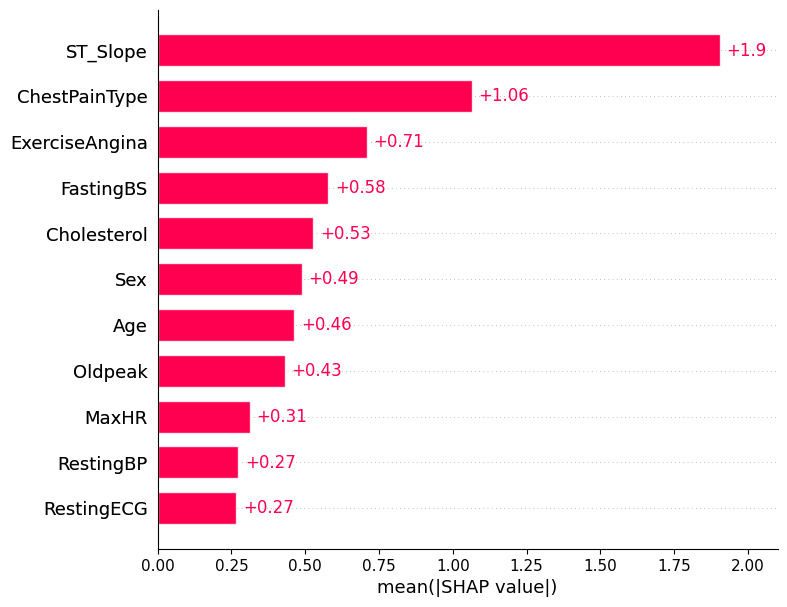

In [334]:
import shap

explainer=shap.Explainer(xgb)
shape_values=explainer(x_test)
shap.plots.bar(shape_values,max_display=12)

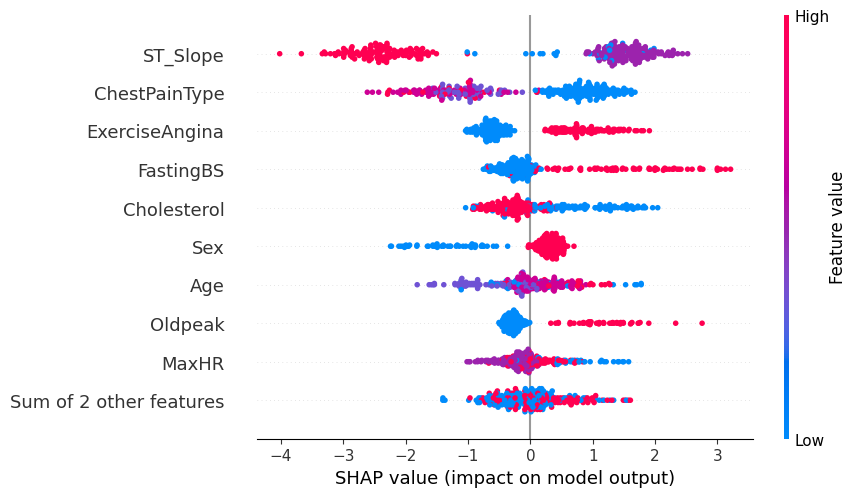

In [335]:
shap.plots.beeswarm(shape_values)